In [3]:
pip install pandas matplotlib plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tkinter as tk

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import plotly.express as px

In [11]:
class FrequencyApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Frequency Analysis")

        # Frame for inputs and table
        self.frame_left = tk.Frame(root)
        self.frame_left.pack(side=tk.LEFT, fill=tk.Y, padx=10, pady=10)

        # Frame for the plot
        self.frame_right = tk.Frame(root)
        self.frame_right.pack(side=tk.RIGHT, fill=tk.BOTH, expand=True)

        # Entry field for column selection
        self.label = tk.Label(self.frame_left, text="Column to Analyze:")
        self.label.pack()
        self.column_entry = tk.Entry(self.frame_left)
        self.column_entry.pack()

        # Button to load file and compute frequency
        self.load_button = tk.Button(self.frame_left, text="Load CSV and Compute Frequency", command=self.load_csv)
        self.load_button.pack(pady=10)

        # Table to display frequency data
        self.table_text = tk.Text(self.frame_left, wrap=tk.WORD, width=30, height=20)
        self.table_text.pack()

        # Plot area using Matplotlib
        self.fig, self.ax = plt.subplots(figsize=(5, 4))
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.frame_right)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    def load_csv(self):
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        if file_path:
            try:
                # Load the CSV file into a DataFrame
                self.df = pd.read_csv(file_path)
                messagebox.showinfo("File Loaded", "CSV file loaded successfully!")
            except Exception as e:
                messagebox.showerror("Error", f"Failed to load CSV file: {e}")
                return

            # Extract and display the frequency table based on user input
            self.compute_frequency()

    def compute_frequency(self):
        column_name = self.column_entry.get().strip()
        if column_name not in self.df.columns:
            messagebox.showerror("Error", f"Column '{column_name}' not found in the CSV file.")
            return

        # Calculate frequency of the specified column
        frequency_data = self.df[column_name].value_counts().reset_index()
        frequency_data.columns = [column_name, "Frequency"]

        # Display the frequency table in the text widget
        self.table_text.delete("1.0", tk.END)
        self.table_text.insert(tk.END, frequency_data.to_string(index=False))

        # Plot the frequency data with Matplotlib
        self.plot_frequency(frequency_data, column_name)

    def plot_frequency(self, frequency_data, column_name):
        self.ax.clear()

        # Plot the frequency data with Matplotlib
        self.ax.bar(frequency_data[column_name], frequency_data["Frequency"], color="skyblue")
        self.ax.set_xlabel(column_name)
        self.ax.set_ylabel("Frequency")
        self.ax.set_title(f"Frequency Distribution of {column_name}")

        # Rotate x-axis labels for better visibility
        self.ax.tick_params(axis='x', rotation=90)

        # Adjust layout to prevent labels from being cut off
        self.fig.tight_layout()

        self.canvas.draw()

        # Create an interactive Plotly plot
        fig_plotly = px.bar(frequency_data, x=column_name, y="Frequency", title=f"Frequency Distribution of {column_name}")
        fig_plotly.show()

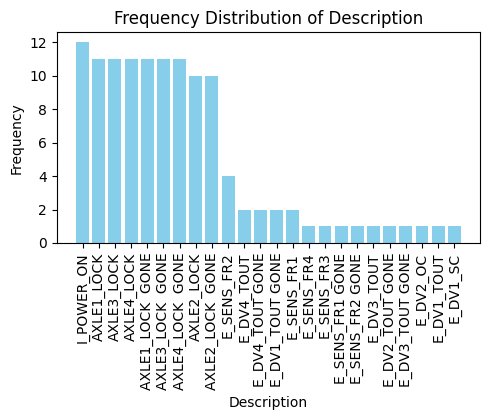

In [12]:
# Create main application window
root = tk.Tk()
app = FrequencyApp(root)
root.mainloop()